## Lasso Regression (L1 Regularization)

LASSO stands for Least Absolute shrinkage and Selection Operator, is a popular technique used in statistical modeling and machine learning to estimate the relationships between and make predictions.

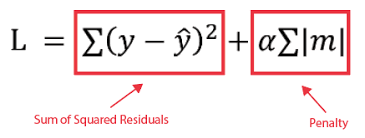

### Why do we need LASSO Regression?

The primary goal of LASSO regression is to reduce overfitting by shrinking and selecting features with less importance.

L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficient to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero.

**Note:** This feature makes LASSO practically useful for **Feature Selection**, as it can automatically identify and discard irrelevant or redundant variable.

### **L₁ = α * (|β₁| + |β₂| + ... + |βₚ|)**

Where:

        α is the regularization parameter that controls the amount of regularization applied.
        β₁, β₂, ..., βₚ are the coefficients.

**Note:** A larger α value increases the amount of regularization, leading to more coefficients being pushed towards zero.

Conversly, a smaller α value reduce the regularization effect, allowing more variables to have non-zero coefficients.

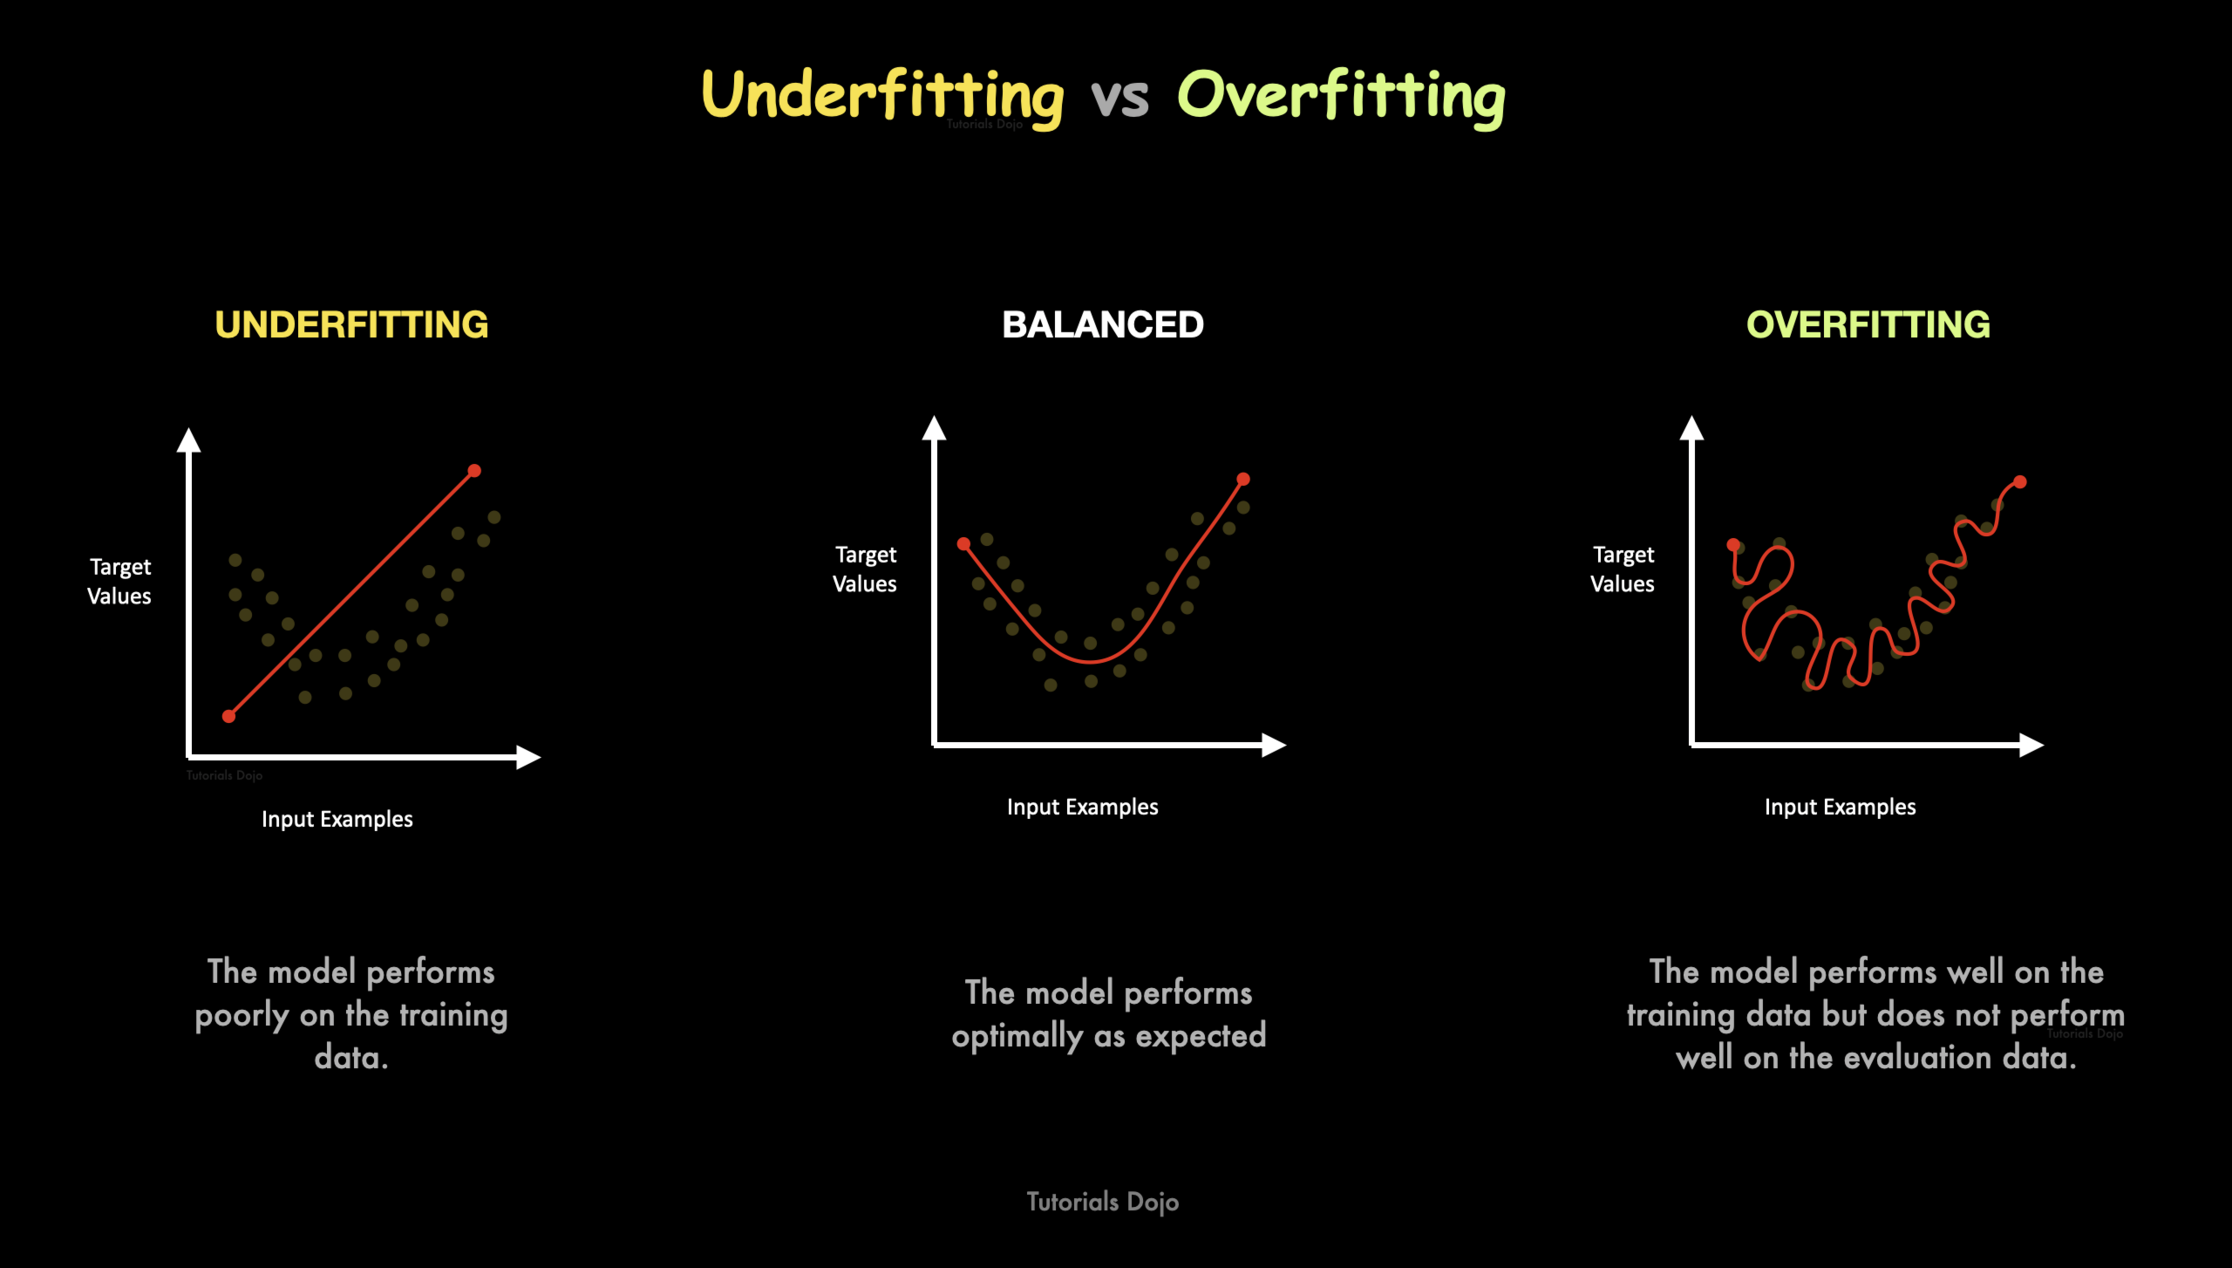

Let's drive into the practical example to understand this concept better.

### Lasso Regression for Linear Data

#### Creating Dataset

Creating a Dataset with One Input and One Target Column using sklearn's make_regression class.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
input_, target_= make_regression(n_samples=250, n_features=1, n_informative=3, n_targets=1, noise=20)

### plotting the Dataset

Text(0, 0.5, 'target')

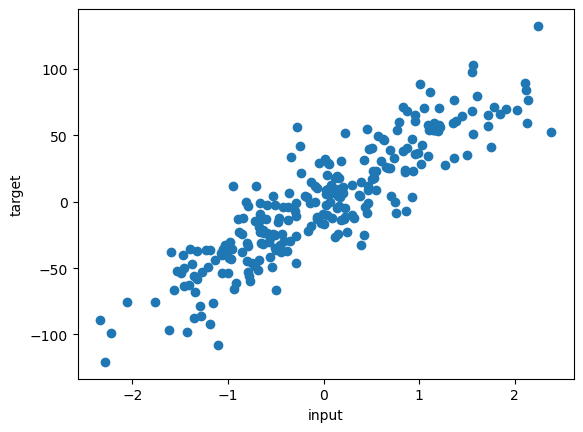

In [3]:
plt.scatter(input_, target_)
plt.xlabel("input")
plt.ylabel("target")

### Splitting data into train and test datasets

In [4]:
train_input, test_input, train_target, test_target= train_test_split(input_, target_, test_size=0.2, random_state=42)

### Applying LinearRegression

In [5]:
lr= LinearRegression()
lr.fit(train_input, train_target)
print("Linear Regression Coefficient", lr.coef_)
print("Linear Regression Intercept", lr.intercept_)

Linear Regression Coefficient [41.01778303]
Linear Regression Intercept -0.416195919419976


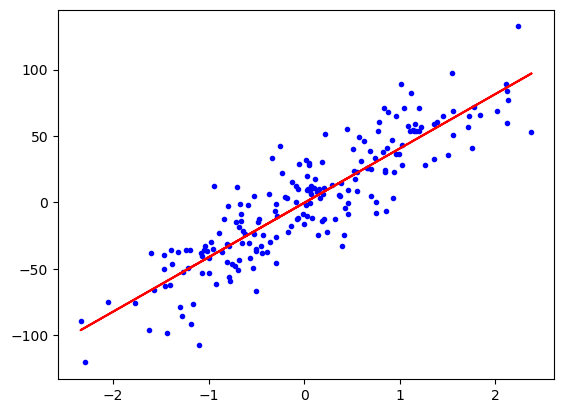

In [6]:
plt.plot(train_input, train_target, "b.")
plt.plot(train_input, lr.predict(train_input), color= "red", label="alpha=0")

In [7]:
rr= Ridge()
rr.fit(train_input, train_target)
print("Ridge Regression Coefficient", rr.coef_)
print("Ridge Regression Intercept", rr.intercept_)

Ridge Regression Coefficient [40.80204098]
Ridge Regression Intercept -0.40749486140137847


In [8]:
rr_pred= rr.predict(test_input)
print("Ridge Regression R2 score:", r2_score(test_target, rr_pred))

Ridge Regression R2 score: 0.821225174524013


### Plotting Different value of 

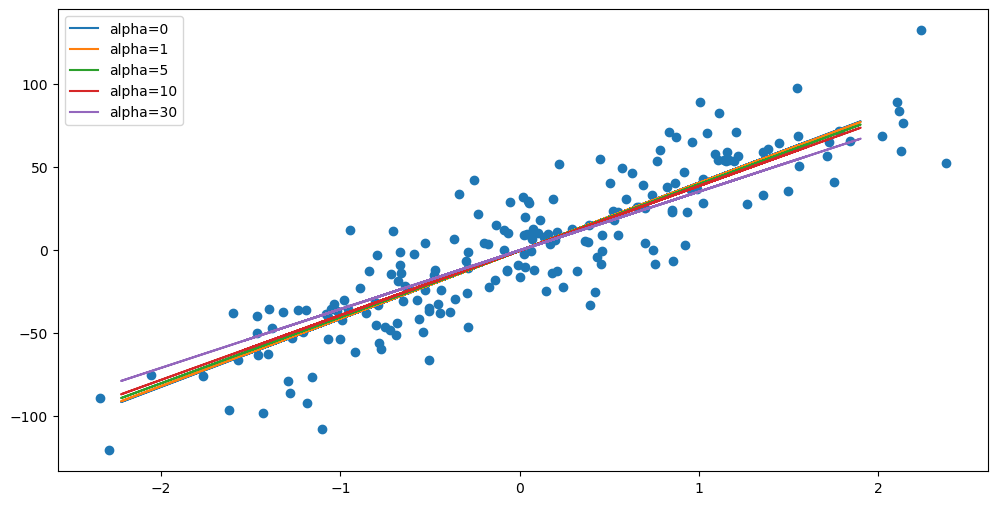

In [9]:
def plot_ridge_alphas(x_train, y_train, x_test, alphas):
    plt.figure(figsize=(12,6))
    plt.scatter(x_train, y_train)

    for alpha in alphas:
        rr= Ridge(alpha= alpha)
        rr.fit(x_train, y_train)
        plt.plot(x_test, rr.predict(x_test), label=f'alpha={alpha}')

    plt.legend()
    plt.show()


# Example usage:
alphas_to_plot= [0, 1, 5, 10, 30]
plot_ridge_alphas(train_input, train_target, test_input, alphas_to_plot)

### Applying Lasso Regression

In [10]:
lasso= Lasso()
lasso.fit(train_input, train_target)
print("Rigid Regression Coefficient", lasso.coef_)
print("Rigid Regression Intercept", lasso.intercept_)

Rigid Regression Coefficient [39.96027687]
Rigid Regression Intercept -0.3735458077619507


In [11]:
lasso_pred= lasso.predict(test_input)
print("Lasso Regression R2 Score:", r2_score(test_target, lasso_pred))

Lasso Regression R2 Score: 0.8187360065220043


/var/folders/kq/_sy8nhx16257tmn3h1tr70100000gn/T/ipykernel_606/527353135.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(x_train, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+04, tolerance: 4.057e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

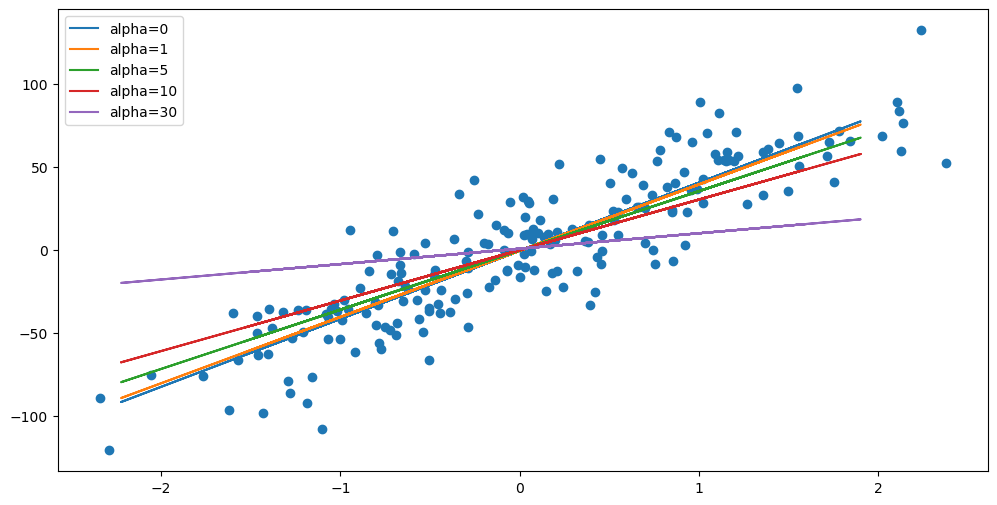

In [12]:
def plot_lasso_alphas(x_train, y_train, x_test, alphas):
    plt.figure(figsize=(12,6))
    plt.scatter(x_train, y_train)

    for alpha in alphas:
        lasso_model= Lasso(alpha= alpha)
        lasso_model.fit(x_train, y_train)
        plt.plot(x_test, lasso_model.predict(x_test), label= f'alpha={alpha}')

    plt.legend()
    plt.show()

#Example usage:
alphas_to_plot= [0,1,5,10,30]
plot_lasso_alphas(train_input, train_target, test_input, alphas_to_plot)

### Lasso Regression for Non-Linear Data

Let's build a polynomial data will represent this equation **y = 0.5x^2 + 0.9x + 2**

#### Generating synthetic data with a Quadratic relationship using NumPy and randomness

In [13]:
# x values randomly generated in the range [-3, 3]
x= 6*np.random.rand(200,1)-3

# Creating a quadratic relationship for the data with same noise
y= 0.5* x**2 + 0.9*x +2 +np.random.randn(200,1)

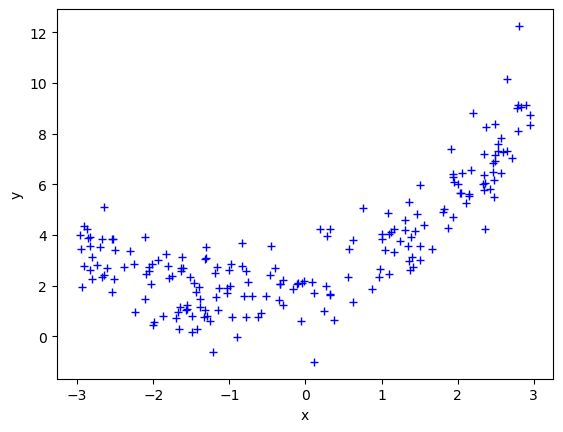

In [14]:
plt.plot(x,y, 'b+')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+02, tolerance: 1.090e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fa

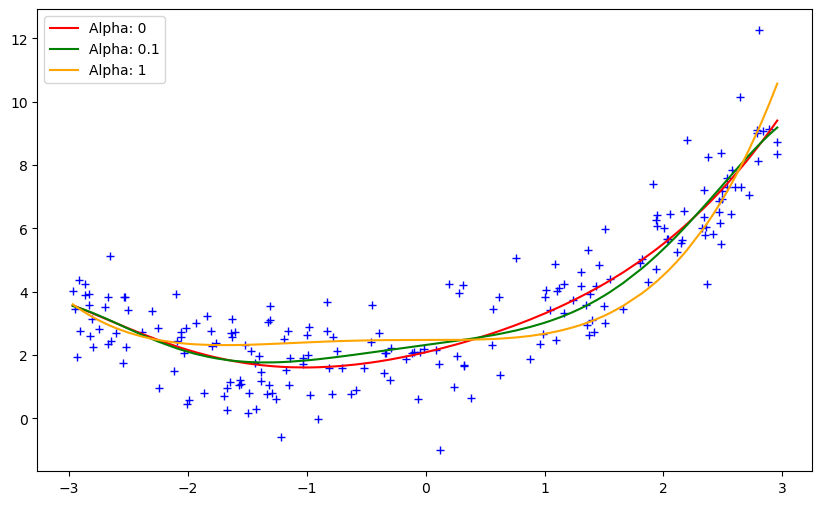

In [18]:
def get_preds_lasso(x, y, alpha):
    model= Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=6)),
        ("lasso", Lasso(alpha=alpha))
    ])
    model.fit(x,y)
    return model.predict(x)

alphas= [0, 0.1, 1]
colors= ["red", "green", "orange"]

plt.figure(figsize=(10,6))
plt.plot(x, y, "b+")

for alpha, color in zip(alphas, colors):
    preds= get_preds_lasso(x, y, alpha)
    #plot
    plt.plot(sorted(x[:,0]), preds[np.argsort(x[:,0])], color, label="Alpha: {}".format(alpha))


plt.legend()
plt.show()

### Observation made are:

* **Low value of alpha** causes **overfitting**
* **High Value of alpha** causes **underfitting**

for both the regularization Techniques

### Difference between Ridge and Lasso Regularization

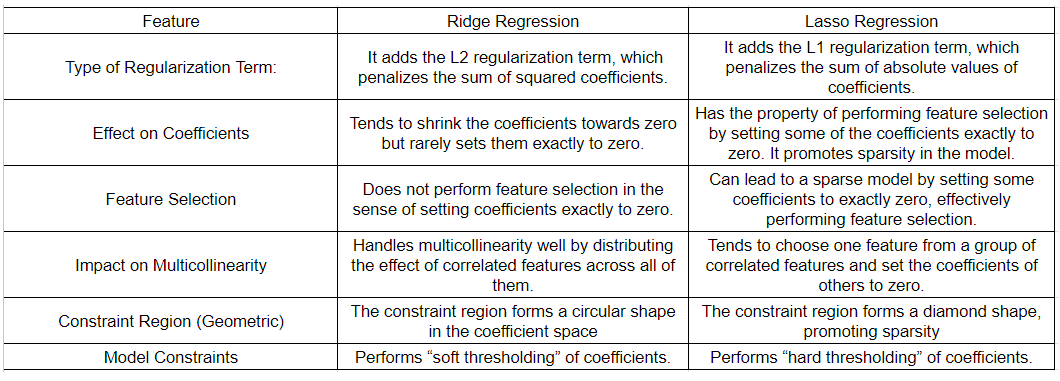

In summary, Lasso is practicularly useful when you suspect that may features are irrelevant or redundant, and you want a sparse model with only a subset of features contributing significantly. Ridge regression, on the other hand, is effective when dealing with multicollinearity and you want to shrink the coefficients without neccessarily eliminating any.

The choice between Lasso and Ridge depends on the specific characteristics of your data and the goals of your modeling task.

In some cases, a combination of both, known as Elastic Net regularization, may be used to leverage the benfits of both L1 and L2 regularization while working with large number of input values.

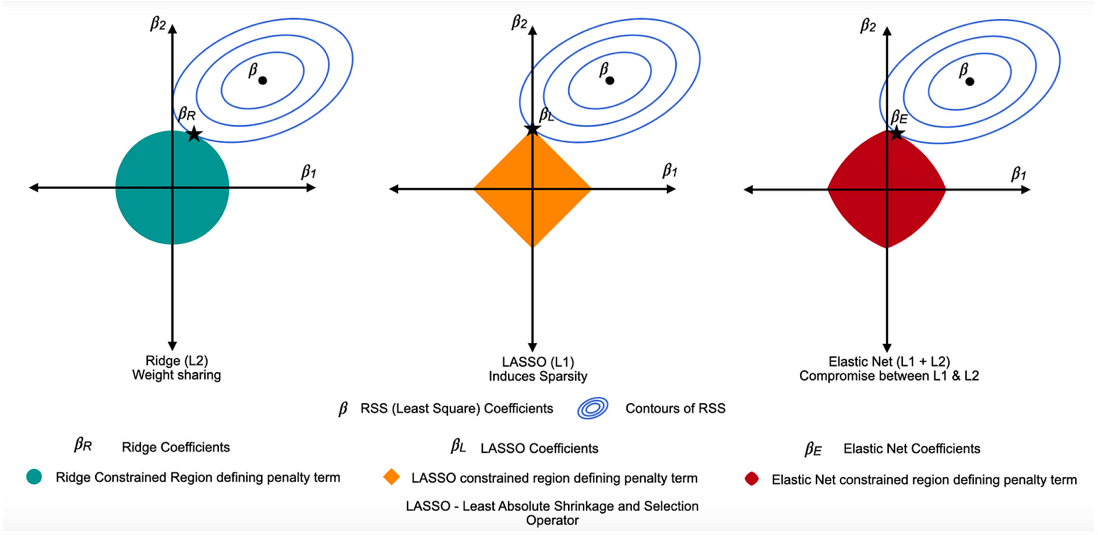